In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#loading the data into a dataframe
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [4]:
#checking for duplicates 
df.duplicated().sum()

1

In [5]:
#dropping the duplicates
df.drop_duplicates()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
#dropping null entries
df.dropna()
df.shape

(303, 14)

In [11]:
#splitting the dataframe into input features and targets
X = df.iloc[:,0:13].values  #input features
y = df["output"].values

m, n = X.shape
print(f"Dimensions of X and y: {X.shape, y.shape}")

Dimensions of X and y: ((303, 13), (303,))


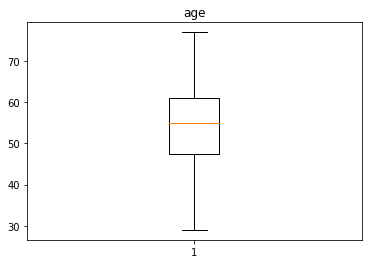

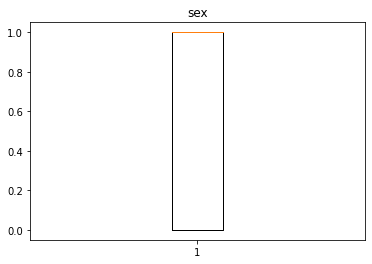

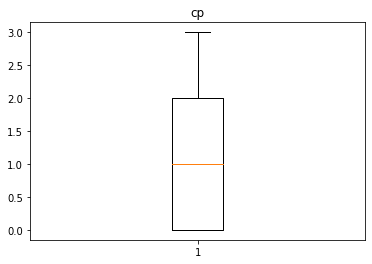

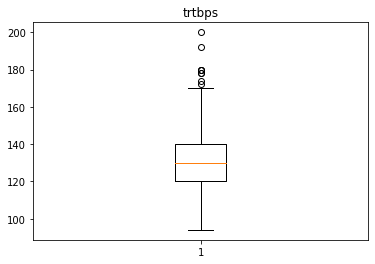

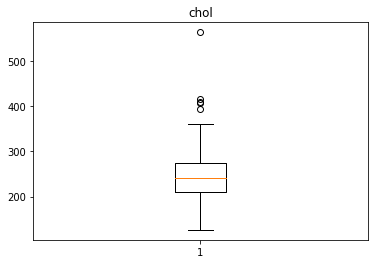

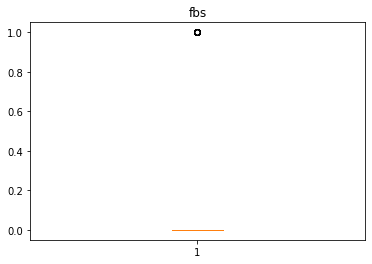

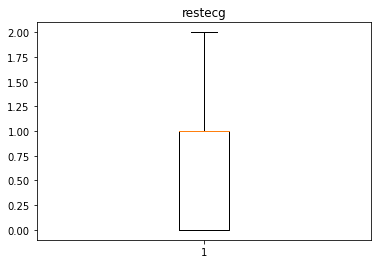

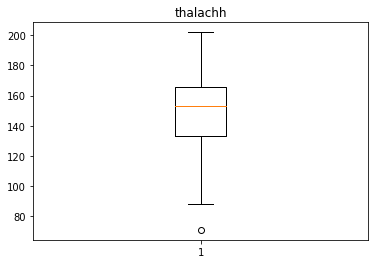

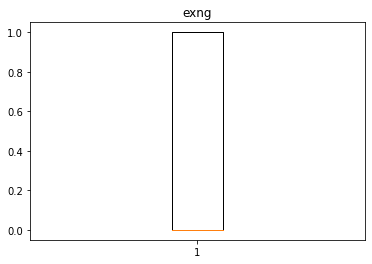

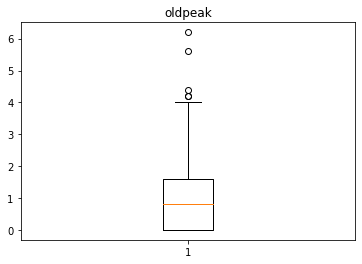

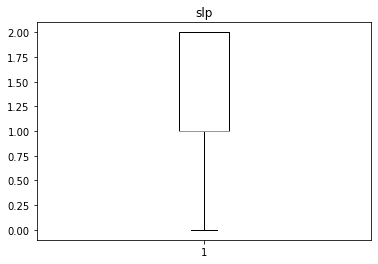

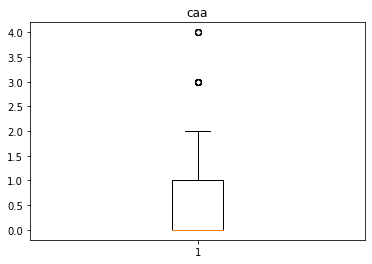

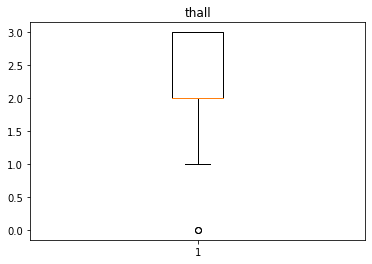

In [13]:
#plotting the feature values using a boxplot
titles=["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]
for i in range(n):
    plt.boxplot(X[:,i])
    plt.title(titles[i])
    plt.show()

In [ ]:
#scaling features whose range is too large

In [14]:
#splitting X and y into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

print(f"Shape of X_train and X_test: {X_train.shape, X_test.shape}")
print(f"Shape of y_train and y_test: {y_train.shape, y_test.shape}")

Shape of X_train and X_test: ((227, 13), (76, 13))
Shape of y_train and y_test: ((227,), (76,))


In [15]:
#splitting the test data into test data and cross validation data

X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, train_size=0.75)

print(f"Shape of X_cv and X_test: {X_cv.shape, X_test.shape}")
print(f"Shape of y_cv and y_test: {y_cv.shape, y_test.shape}")

Shape of X_cv and X_test: ((57, 13), (19, 13))
Shape of y_cv and y_test: ((57,), (19,))
